**Import packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Generate dataset**

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(centers=4, n_samples=500, random_state=0, cluster_std=0.7)
print(X[:10])
print(y_true[:10])

[[ 2.46023257  1.14242178]
 [ 3.66800921  0.15565258]
 [ 1.00830104  4.17275863]
 [ 0.16694238  4.850626  ]
 [ 1.14069873  2.05835514]
 [-1.59017142  3.87520033]
 [-0.11902434  2.88666546]
 [ 0.70514131  4.0921754 ]
 [ 1.42436215  3.1719181 ]
 [-1.08861845  7.97649598]]
[1 1 0 0 1 2 2 0 0 3]


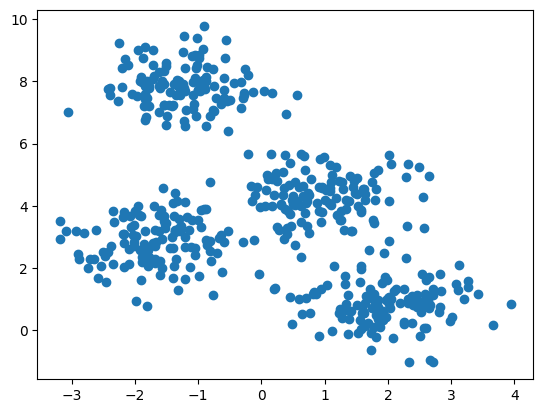

In [3]:
plt.scatter(X[:,0],X[:,1]);

**Hierarchical Clustering not from scratch**

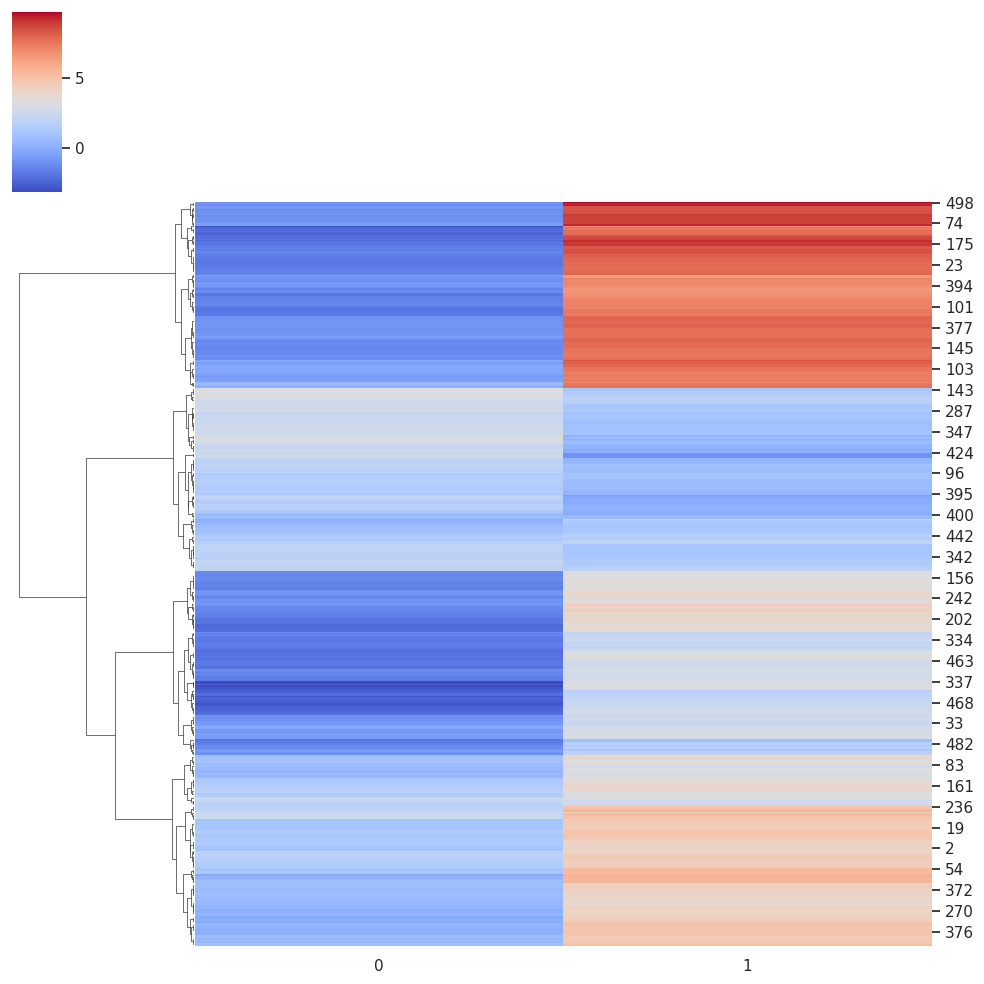

In [4]:
import seaborn as sns; sns.set(color_codes=True)
clustergrid = sns.clustermap(X, method="ward", cmap="coolwarm", col_cluster=False); # Cluster only the rows

**Clustering Quality Metrics**

In [5]:
from scipy.cluster.hierarchy import fcluster
threshold = 4
cluster_labels = fcluster(clustergrid.dendrogram_row.linkage, threshold, criterion='maxclust')

In [6]:
print("Cluster labels:", cluster_labels)

Cluster labels: [2 2 4 4 2 3 3 4 4 1 3 2 3 1 4 4 2 4 1 4 4 2 3 1 4 1 2 3 1 3 3 3 2 3 3 2 1
 4 1 2 1 4 4 2 3 2 4 4 2 2 1 1 3 4 4 3 3 1 1 2 2 1 2 2 2 3 4 2 4 3 1 4 1 2
 1 2 3 3 4 4 1 4 1 4 4 3 1 1 2 1 1 1 2 1 4 4 2 2 2 4 1 1 2 1 4 4 3 2 4 1 1
 3 1 1 2 1 2 4 3 2 4 1 2 2 1 2 2 2 2 1 4 1 3 1 1 1 4 2 4 3 2 2 2 2 3 1 4 4
 3 1 1 2 4 4 4 3 3 2 3 4 2 4 2 2 3 3 2 4 1 3 2 1 2 3 4 1 4 1 1 1 2 2 4 4 3
 1 3 2 3 1 2 3 1 3 3 1 4 3 4 1 1 4 3 3 4 3 3 4 3 3 3 2 2 2 4 2 3 1 1 1 4 2
 3 1 3 2 1 4 1 3 3 3 3 3 4 4 4 3 1 2 4 3 3 2 1 1 4 2 4 4 4 3 2 1 4 1 1 3 1
 3 4 4 2 1 2 4 4 4 1 2 4 1 2 3 2 1 3 3 4 2 2 4 2 3 2 3 3 2 4 4 4 2 1 1 2 1
 1 1 4 2 2 1 4 1 2 2 3 1 1 4 1 4 2 4 1 3 1 3 3 4 4 4 3 3 1 2 4 3 1 2 4 4 2
 2 3 2 3 3 4 3 1 2 2 4 2 4 2 2 2 2 4 2 4 2 4 4 1 4 4 1 1 3 4 2 2 3 3 2 3 1
 4 4 4 1 4 3 4 1 1 4 1 1 3 1 1 3 3 3 3 1 1 1 1 2 1 2 4 2 1 4 2 4 2 4 3 3 1
 3 1 3 4 2 1 3 4 2 1 3 3 4 2 4 2 3 2 4 2 1 3 2 1 2 4 2 4 3 2 1 4 4 3 2 2 4
 4 3 4 3 1 2 3 2 1 3 3 3 1 3 4 1 3 3 3 3 3 4 1 2 3 2 4 2 3 1 4 1 3 1 4 1 4
 3 3 1 3 

In [7]:
y_true

array([1, 1, 0, 0, 1, 2, 2, 0, 0, 3, 2, 1, 2, 3, 0, 0, 1, 0, 3, 0, 0, 1,
       2, 3, 0, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 0, 3, 1, 3, 0, 0, 1,
       2, 1, 0, 0, 1, 1, 3, 3, 2, 0, 0, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2,
       0, 1, 0, 2, 3, 0, 3, 1, 3, 1, 2, 2, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3,
       1, 3, 3, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 3, 1, 3, 0, 0, 2, 1, 0, 3,
       3, 2, 3, 3, 1, 3, 1, 0, 2, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 0, 3,
       2, 3, 3, 3, 0, 1, 0, 2, 1, 1, 1, 1, 2, 3, 0, 0, 2, 3, 3, 1, 0, 0,
       0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 3, 2, 1, 3, 1, 2, 0, 3,
       0, 3, 3, 3, 1, 1, 1, 0, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 0, 2,
       0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 3, 3, 3,
       0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 1, 1, 2,
       2, 1, 3, 3, 0, 1, 0, 0, 0, 2, 1, 3, 0, 3, 3, 2, 3, 2, 0, 0, 1, 3,
       1, 1, 0, 0, 3, 1, 0, 3, 1, 2, 1, 3, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 3, 3, 1, 3, 3, 3, 0, 1, 1,

In [8]:
# Fixup labels
for index, item in np.ndenumerate(cluster_labels):
    if item == 1:
        cluster_labels[index] = 3
    elif item == 2:
        cluster_labels[index] = 1
    elif item == 3:
        cluster_labels[index] = 2
    elif item == 4:
        cluster_labels[index] = 0

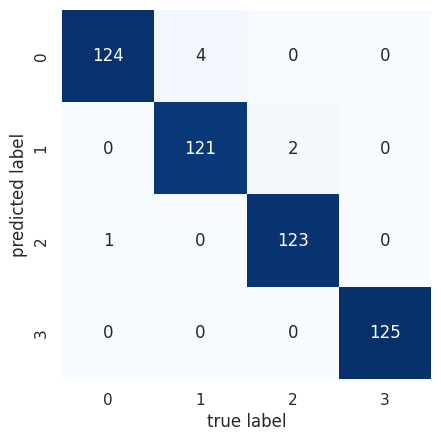

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, cluster_labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, cluster_labels)

0.986